## Part 1 기계지능
### CHAPTER 1 인공지능

* 일반적으로 머신러닝 이라고 하면, 지도학습과 비지도학습에 대해서 배우지만, <br>
    이 책에는 비지도 학습과 강화학습(Reinforcement learning)도 함께 다룬다.
* chap1 에서는 인공지능 영역에서의 일반적인 용어와 개념을 소개하고 있다.
---
<center><목차></center>
<center>1.1 알고리즘</center>
<center>1.2 신경망</center>
<center>1.3 데이터의 중요성</center>
<center>1.4 마무리</center>

### 1.1 알고리즘

#### 1.1.1 데이터 유형
* 특징(feature) : 알고리즘에 들어가는 input data <br>
    ex) 잠재적 채무자의 수입과 저축 (금융 분야)
* 라벨(label) : 지도 학습 알고리즘에서 학습의 대상(target)이 되는 output data <br>
    ex) 잠재적 채무자의 신뢰도 (신뢰 여부..)

#### 1.1.2 학습 유형
* 지도학습
    * 목표 : 입력값과 출력값의 관계 학습
    * 알고리즘 예시 : 최소 자승법 (OLS), 신경망(NN)
    * 금융에서 잠재적 채무자가 신뢰할 만한 사람인지 아닌지 예측(이진 분류)
* 비지도 학습  
    * 목표 : label data x, 주어진 입력값만을 사용해서 알고리즘으로 데이터 내의 구조 찾기
    * 알고리즘 예시 : 클러스터링
    * 금융에서는 몇 개의 그룹으로 분류하는 데 사용(multi-classification)
* 강화 학습
    * 목표 : 환경에서, agent(객체)가 한 state(시점)에서 reward(보상)을 최대화할 수 있는 action(행동) 학습
    * 바둑, 자율주행, 로봇 등에 사용

C:\Users\gjm10\AppData\Local\Temp\ipykernel_7368\3489041471.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # seaborn 고정
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


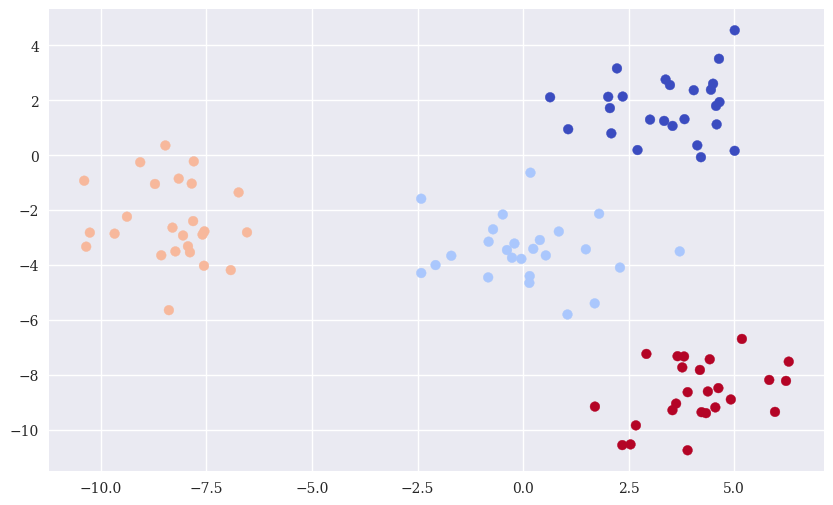

In [110]:
# 비지도 학습 코드 에시
import numpy as np
import pandas as pd
from pylab import plt, mpl

plt.style.use('seaborn') # seaborn 고정
mpl.rcParams['savefig.dpi'] = 300 # dpi 설정
mpl.rcParams['font.family'] = 'serif' # 폰트 설정
# 출력 옵션 설정, 정밀도 4, 소수점 이하 작은 수 0 표시 x
np.set_printoptions(precision=4, suppress = True)

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# make_blobs : 모든 방향으로 같은 성질을 가지는 정규분포를 이용해 가상 데이터 생성,
# 즉, 클러스터링 용 가상데이터를 생성하기 위한 함수

# x, y(군집 레이블) 나누기
x, y = make_blobs(n_samples=100, centers=4, # 4개 중심(4개 군집)
                  random_state=500, cluster_std=1.25)

# 모델 생성 및 fit
model = KMeans(n_clusters=4, random_state=0)
model.fit(x)

KMeans(n_clusters=4, random_state=0)
y_ = model.predict(x)
y_

#시각화
plt.figure(figsize=(10, 6))
plt.scatter(x[:,0], x[:, 1], c= y_, cmap='coolwarm')

* 이 알고리즘을 통해, 은행의 잠재적 채무자와 실제 채무자를 학습
* 잠재적 채무자의 신뢰도 학습 후 -> 2개의 클러스터 생성

In [111]:
# 강화학습 코드 예시
# 동전 던지기 게임 (앞면 80%, 뒷면 20%)

ssp = [1,1,1,1,0] # 상태 공간
asp = [1,0] # 행동 공간

def epoch():
    tr = 0
    for _ in range(100):
        s = np.random.choice(ssp)
        a = np.random.choice(asp) # action 자체가 50% 확률
        if a == s:
            tr +=1
    return tr

rl = np.array([epoch() for _ in range(15)])
rl

array([48, 61, 53, 52, 52, 43, 52, 53, 48, 55, 51, 53, 52, 44, 48])

In [112]:
rl.mean()
# 따라서 r1에 대한 결과도 50% 선에서 나온다.

51.0

In [113]:
# 위 결과 개선 코드

ssp = [1,1,1,1,0] # 상태 공간

def epoch():
    tr = 0
    asp = [1,0] # 행동 공간 재 설정
    for _ in range(100):
        s = np.random.choice(ssp)
        a = np.random.choice(asp) # action에서 현재 state 반영
        if a == s:
            tr +=1
        asp.append(s)
    return tr

rl = np.array([epoch() for _ in range(15)])
rl

array([67, 61, 76, 53, 56, 64, 69, 70, 73, 63, 69, 69, 62, 65, 56])

In [114]:
rl.mean()
# 50%보다 조금 더 비중 증가

64.86666666666666

#### 1.1.3 작업 유형
* 추정(회귀)
* 분류

#### 1.1.4 방법론 유형
1. 인공지능
2. 머신러닝
3. 딥러닝
----
* 이 책에서는 딥러닝포커스에 맞춘다고 함.
    * DNN
    * RNN
    * CNN
    

### 1.2 신경망
* 최소자승법, 신경망 비교 설명
* 접근법 : 지도 학습

#### 1.2.1 최소자승 회귀분석

$$ f : R -> R, \  y = 2x^2 - \frac{1}{3}x^3 $$

In [115]:
def f(x):
    return 2*x**2 - x**3/3

x = np.linspace(-2,4,25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [116]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

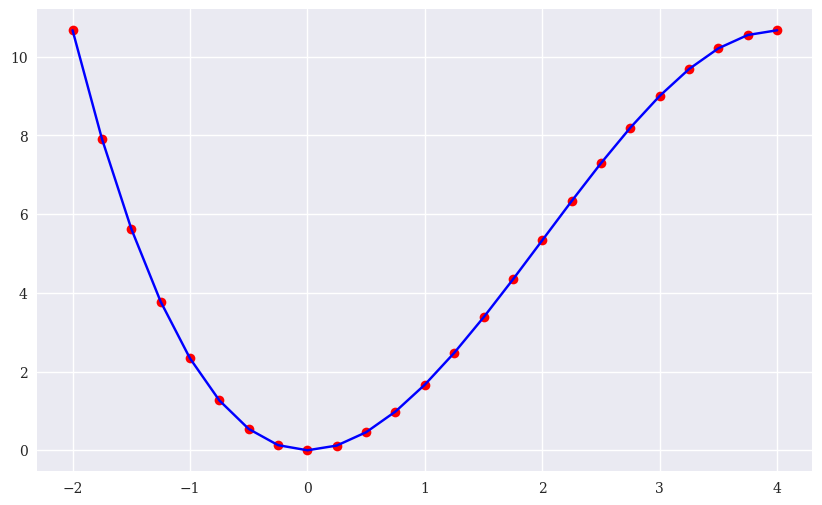

In [117]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro')
plt.plot(x, f(x), 'b-')
plt.show()

* 최소 자승 선형 회귀 문제 -> 입력값과 출력값의 함수 관계 선형 가정
* 선형 방정식의 최적 파라미터 값 $\alpha$와 $\beta$를 찾는다.

$$ \hat{f} : R -> R, \hat{y} = \alpha + \beta x$$

* loss -> MSE을 최소화 하는 것 (식은 생략)

* 단순 선형 회귀에서 최적해 $\alpha^*$, $\beta^*$ 계산

$$ \beta^* = \frac{Cov(x,y)}{Var(x)} $$

$$ \alpha^* = \bar{y}-\beta \bar{x} $$

beta : 1.0541666666666667
alpha : 3.8625000000000003
MSE : 10.721953125


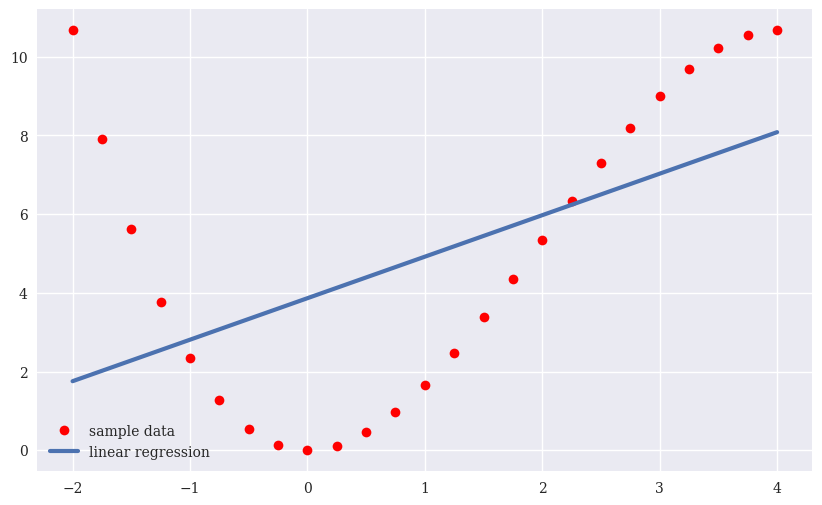

In [118]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x) # beta 계산
# ddof : std 함수의 인자(표본표준편차 게산의 분모가 되는 자유도)
print("beta :" ,beta) 

alpha = y.mean() - beta * x.mean() # alpha 계산
print("alpha :", alpha)

y_ = alpha + beta * x
MSE = ((y - y_) ** 2).mean() # MSE loss 계산
print("MSE :", MSE)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label = 'sample data')
plt.plot(x, y_, lw=3.0, label = 'linear regression')
plt.legend()

* MSE loss를 줄이는 과정은 매우 중요하다.
* 2차항과 3차항을 기저함수로 넣게 되면 평균제곱오차 감소하는 것을 확인할 수 있다.
    * 모델 유연성 증가(곡선 관계 표현 가능)
    * 과적합 위험 존재

deg = 1, MSE = 10.72195
deg = 2, MSE = 2.31258
deg = 3, MSE = 0.00000


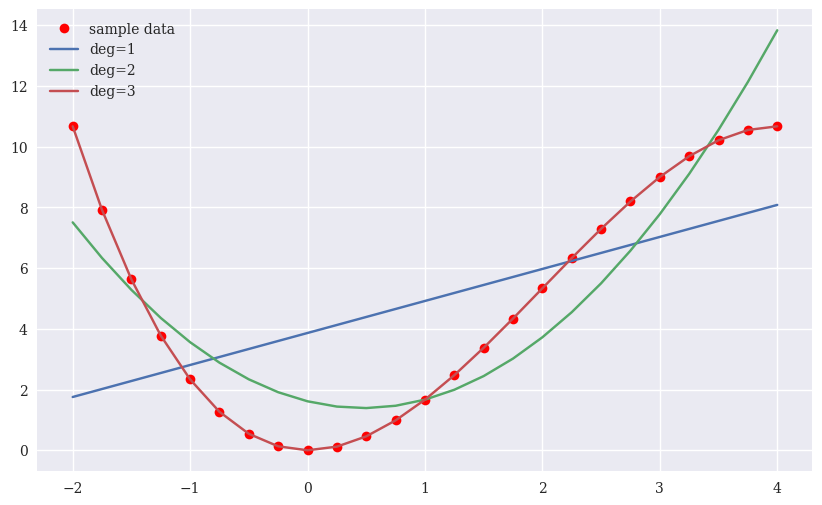

In [119]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro', label = 'sample data')

for deg in [1,2,3]:
    reg = np.polyfit(x, y, deg= deg) # 회귀 분석(계수 구하기)
    y_ = np.polyval(reg, x) # 추정(예측값)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg = {deg}, MSE = {MSE:.5f}')

    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
    plt.legend()

#### 1.2.2 신경망을 사용한 추정
* 앞서서 OLS를 사용해서 회귀 모형 만들어 보았다.
* 일반적인 모든 함수 관계는 단순하지 않다.
* 따라서 복잡한 task들을 해결하기 위해서, 신경망 모델을 구축하고자 한다.

In [120]:
# scikit-learn 패키지 중 MLPRegressor 클래스를 사용해서 DNN 신경망 구축

from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes= 3 * [256],
                     learning_rate_init=0.03,
                     max_iter= 5000)

model.fit(x.reshape(-1,1), y) # x 학습

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [121]:
y_ = model.predict(x.reshape(-1,1)) # y 학습
MSE = ((y - y_) ** 2).mean()
MSE

0.0062507405373577905

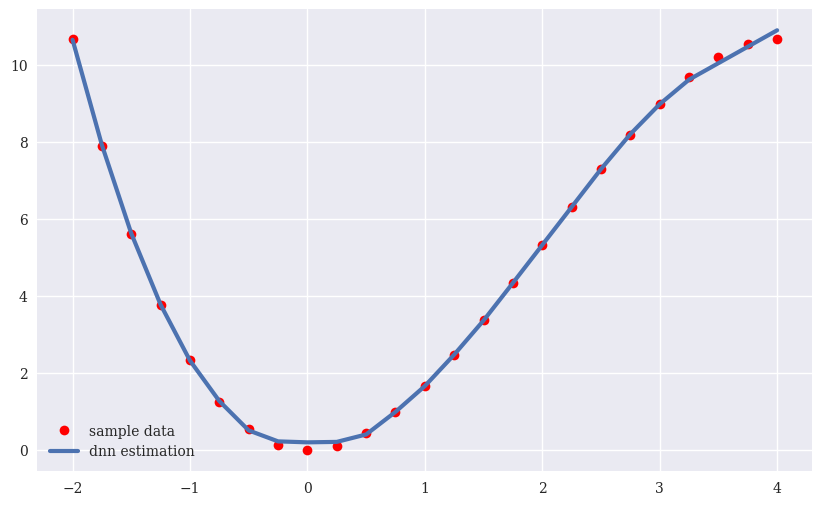

In [122]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro', label = 'sample data')
plt.plot(x, y_, lw=3.0, label = 'dnn estimation')
plt.legend()

1/1 [==============================] - 0s 48ms/step
round=1, MSE =  2.94732
1/1 [==============================] - 0s 22ms/step
round=2, MSE =  0.74952
1/1 [==============================] - 0s 20ms/step
round=3, MSE =  0.24191
1/1 [==============================] - 0s 24ms/step
round=4, MSE =  0.12112
1/1 [==============================] - 0s 25ms/step


round=5, MSE =  0.08972
1/1 [==============================] - 0s 18ms/step
round=6, MSE =  0.07288
1/1 [==============================] - 0s 25ms/step
round=7, MSE =  0.06024
1/1 [==============================] - 0s 24ms/step
round=8, MSE =  0.04987
1/1 [==============================] - 0s 25ms/step
round=9, MSE =  0.04112


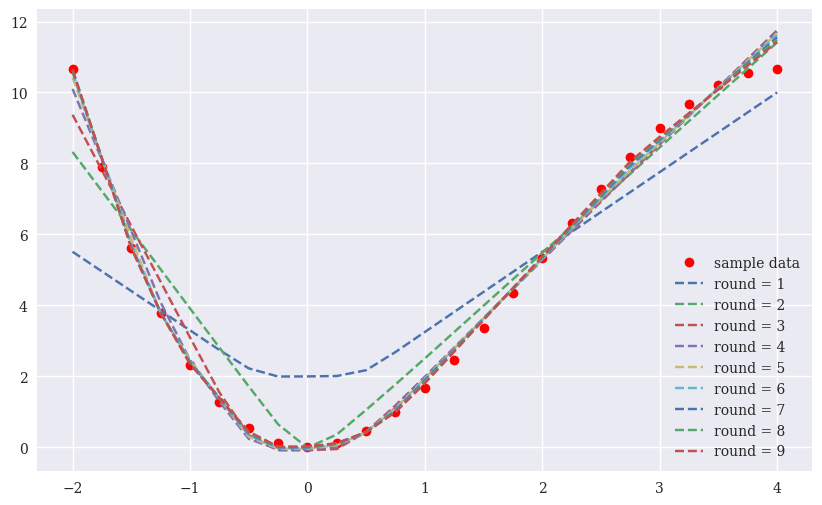

In [123]:
# 케라스 사용 Keras 딥러닝 패키지의 Sequential 모델 사용
# Sequential 모델 : 여러 개의 레이어를 선형으로 쌓아 올린 구조

import tensorflow as tf
tf.random.set_seed(100)

from keras.layers import Dense
from keras.models import Sequential

model = Sequential() # 모델 생성
model.add(Dense(256, activation = 'relu', input_dim = 1)) # 활성화 함수 가지는 은닉층 add
model.add(Dense(1, activation = 'linear')) # 출력층 add 
model.compile(loss = 'mse', optimizer = 'rmsprop') # complie함. loss랑 옵티마이저 설정

((y-y_) **2).mean()

#시각화
plt.figure(figsize= (10,6))
plt.plot(x, y, 'ro', label = 'sample data')

for _ in range(1, 10):
    model.fit(x, y, epochs = 100, verbose = 0) # 학습 과정 중 정보 출력 여부
    y_ = model.predict(x) # 추정 단계
    MSE = ((y - y_.flatten()) **2).mean() # MSE 계산
    print(f'round={_}, MSE = {MSE : .5f}')
    plt.plot(x, y_, '--', label = f'round = {_}')
plt.legend() # 범례 추가

In [124]:
y_

array([[10.6475],
       [ 8.1339],
       [ 5.6203],
       [ 3.7964],
       [ 2.3442],
       [ 1.3922],
       [ 0.4432],
       [ 0.0198],
       [ 0.0198],
       [ 0.1191],
       [ 0.4309],
       [ 0.9913],
       [ 1.8004],
       [ 2.6945],
       [ 3.5886],
       [ 4.4828],
       [ 5.3769],
       [ 6.271 ],
       [ 7.1652],
       [ 8.0593],
       [ 8.7512],
       [ 9.42  ],
       [10.0888],
       [10.7576],
       [11.4264]], dtype=float32)

In [125]:
y_.shape

(25, 1)

In [126]:
y.shape

(25,)

* OLS 회귀 분석에서는 MSE 값을 0에 수렴하게끔 모델을 학습 시켰지만, DNN 구조에서는 MSE 값이 0에 수렴하지 않는다.
* 그러면 DNN 구조의 학습 과정은 덜 떨어진 학습 과정인 것일까? (X)

deg = 1, MSE = 0.28153
deg = 5, MSE = 0.27331
deg = 9, MSE = 0.25442
deg = 11, MSE = 0.23458
deg = 13, MSE = 0.22989
deg = 15, MSE = 0.21672


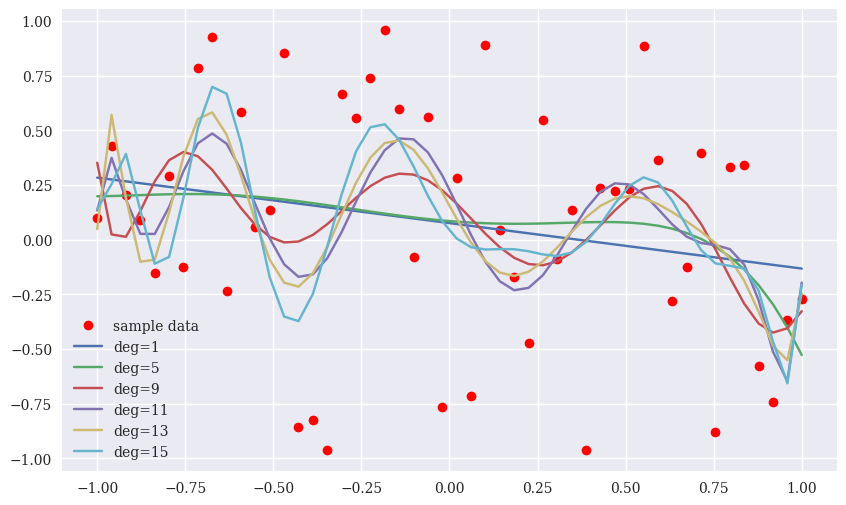

In [127]:
# 랜덤 샘플 데이터 생성 후 최소자승 회귀분석

np.random.seed(0)
x = np.linspace(-1, 1) # -1 ~ 1까지의 값을 같는 배열
y = np.random.random(len(x))*2 -1 # 0~1 사이의 난수에 * 2하고 -1해서,  -1~1 사이의 범위 생성

plt.figure(figsize= (10,6))
plt.plot(x, y, 'ro', label = 'sample data')

for deg in [1,5,9,11,13,15]:
    reg = np.polyfit(x, y, deg= deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg = {deg}, MSE = {MSE:.5f}')

    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend()
    

* 위 결과는 신경망 보다 MSE 값도 높고, 추정 결과도 좋지 않은 것으로 확인된다.

In [128]:
model = Sequential() # 모델 생성
model.add(Dense(256, activation = 'relu', input_dim = 1))
for _ in range(3): # 은닉층 3개
    model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'rmsprop')

model.summary()

# 파라미터
# 가중치(256) + 편향(256) = 512
# 가중치(256 x 256) + 편향(256) = 65792

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 256)               512       
                                                                 
 dense_30 (Dense)            (None, 256)               65792     
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dense_32 (Dense)            (None, 256)               65792     
                                                                 
 dense_33 (Dense)            (None, 1)                 257       
                                                                 
Total params: 198145 (774.00 KB)
Trainable params: 198145 (774.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2/2 [==============================] - 0s 8ms/step
round=1, MSE =  0.16175
2/2 [==============================] - 0s 8ms/step
round=2, MSE =  0.15863
2/2 [==============================] - 0s 4ms/step
round=3, MSE =  0.12743
2/2 [==============================] - 0s 0s/step
round=4, MSE =  0.07676
2/2 [==============================] - 0s 0s/step
round=5, MSE =  0.09336


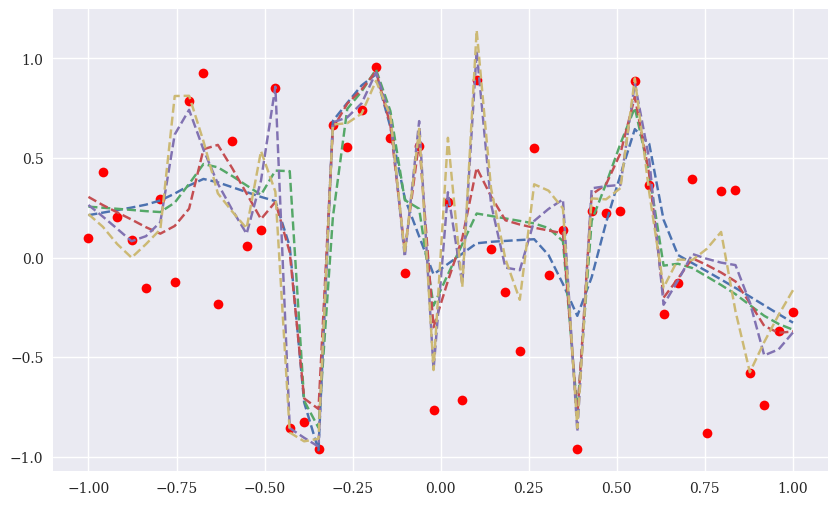

In [129]:
#시각화
plt.figure(figsize= (10,6))
plt.plot(x, y, 'ro', label = 'sample data')

for _ in range(1, 6):
    model.fit(x, y, epochs = 500, verbose = 0) # 학습 과정 중 정보 출력 여부
    y_ = model.predict(x) # 추정 단계
    MSE = ((y - y_.flatten()) **2).mean() # MSE 계산
    print(f'round={_}, MSE = {MSE : .5f}')
    plt.plot(x, y_, '--', label = f'round = {_}')
# plt.legend() # 범례 추가

MSE 값이 낮아졌다가 다시 올라가는 결과를 볼 수 있다. <br>
-> 이는 모델이 너무 오버피팅돼서 generalizaton error가 올라가는 현상을 볼 수 있다.

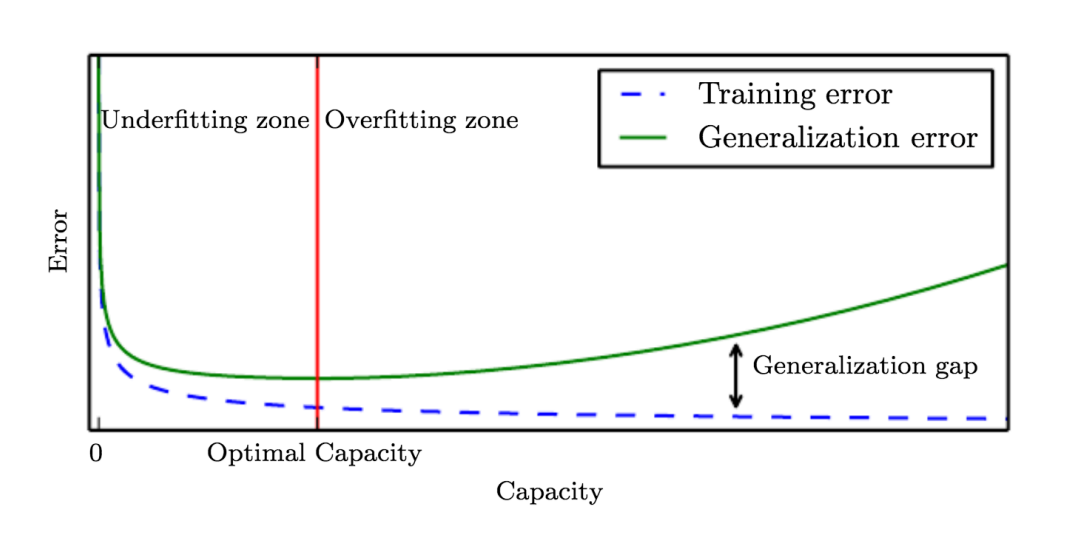

#### 1.2.3 신경망을 사용한 분류

In [130]:
f = 5
n = 10

np.random.seed(100)
x = np.random.randint(0,2, (n, f)) # 10by5
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [131]:
y = np.random.randint(0,2,n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [132]:
model = Sequential() # 모델 생성
model.add(Dense(256, activation = 'relu', input_dim = f))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])

model.fit(x, y, epochs=50, verbose = False)

y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

1/1 [==============================] - 0s 52ms/step


array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [133]:
y = y_

In [134]:
# history 객체에 대해서 오류 발생
# 주말 내로 해결 하고자 한다
# res = pd.DataFrame(model.history.history)
# res.plot(figsize = (10,6))
# plt.show()

#### 신경망과 OLSRegression과의 특징 비교

**1. 문제 독립성**
* 신경망 : **특징값**만 주어진다면 추정, 라벨 분류 문제 다 풀이 가능
* OLS : 특정한 문제만 해결 가능, 다른 문제에는 적용할 수 없다.

**2. 점진적 학습**
* 신경망 : backpropagation 과정을 이용해서 무작위 초깃값을 시작으로 주어진 성공 측도에 대해 점진적으로 향상

**3. 범용근사**
* 신경망은 (은닉층이 1개이더라도) 대부분의 함수를 근사화할 수 있따는 강력한 수학적 정리 존재

### 1.3 데이터의 중요성

#### 1.3.1 소규모 데이터셋
* 이진 특징값을 가진 알고리즘도  어떤 무작위 패턴에 대해서도 기본 예측 값은 항상 50% 정도의 정확도를 가진다. (baseline)
* 간단한 코드 구현을 통해서, 분류 문제가 모든 패턴에 대해 의미 있는 결과 학습하는 것은 불가능하다

**두 가지 문제점 발생**
1. 패턴이 같은 샘플 데이터에 있찌 않다.
    * 데이터셋 내의 패턴 또는 규칙성이 명확하지 않거나, <br> 데이터가 너무 무작위로 분포되어 있어서 학습 알고리즘이 이를 의미 있게 인식하고 학습하기 어렵다는 것을 의미
2. 표본의 크기가 패턴마다 너무 작을 수 있다.

In [135]:
# 데이터 생성
f = 10
n = 250
np.random.seed(100)

x= np.random.randint(0, 2, (n,f)) # 250by10

y = np.random.randint(0, 2, n)

In [136]:
fcols = [f'f{_}' for _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [137]:
data = pd.DataFrame(x, columns = fcols)
data['l'] = y
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int32
 1   f1      250 non-null    int32
 2   f2      250 non-null    int32
 3   f3      250 non-null    int32
 4   f4      250 non-null    int32
 5   f5      250 non-null    int32
 6   f6      250 non-null    int32
 7   f7      250 non-null    int32
 8   f8      250 non-null    int32
 9   f9      250 non-null    int32
 10  l       250 non-null    int32
dtypes: int32(11)
memory usage: 10.9 KB


In [138]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier(hidden_layer_sizes= [128, 128, 128],
                      max_iter=1000, random_state=100)
model.fit(data[fcols], data['l'])
MLPClassifier(hidden_layer_sizes=[128,128,128], max_iter = 1000,
              random_state=100)

accuracy_score(data['l'], model.predict(data[fcols]))

0.952

* 전체 데이터셋에 대해 학습하기에, 높은 성능을 보인다.
* 적은 데이터셋에 대해 상대적으로 큰 신경망을 사용했기 때문이다.

**그렇다면 test data에 대해서도 성능이 높게 나올까 ?**

In [139]:
split = int(len(data) * 0.7)
train = data[:split]
test = data[split:]

model.fit(train[fcols], train['l'])
#MLPClassifier(hidden_layer_sizes=[128,128,128], max_iter = 1000,
#              random_state=100)

accuracy_score(train['l'], model.predict(train[fcols]))

0.9714285714285714

In [140]:
accuracy_score(test['l'], model.predict(test[fcols])) # 표본 수 부족

0.38666666666666666

* 테스트 데이터에 대해서는 학습되지 않은 알고리즘 보다 10% 낮은 수준의 예측력을 보인다.
* 데이터셋이 작을수록 학습은 쉬워지지만, 학습된 신경망이 테스트 데이터에 대해 예측할 때 정보가 너무 없다.

#### 1.3.2 대규모 데이터셋

* 정말 간단하게 위와 같은 문제들은 많은 데이터를 사용하면 해결될 일이다.

In [141]:
factor = 100
big = pd.DataFrame(np.random.randint(0, 2, (factor*n, f)), # 5000by10
                    columns = fcols)
big['l'] = np.random.randint(0, 2, factor * n)
train = big[:split]
test = big[split:]

model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [142]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9485714285714286

In [143]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.5000604229607251

**예측 정확도가 오른 이유** <br/>
    1. 데이터셋에 모든 가능한 패턴 존재 <br/>
    2. 모든 패턴 약 10번 이상의 빈도 가짐 (모든 패턴에 대해 여러 번 확인)

In [144]:
grouped = big.groupby(list(data.columns)) #위 data(df에서 가져옴)

# unstack : 다중 인덱스에서 일반적인 열 구조로 재구성
freq = grouped['l'].size().unstack(fill_value=0) # 빈도 없는 경우 0
freq['sum'] = freq[0] + freq[1]
freq.head(15)

l                               0   1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9             
0  0  0  0  0  0  0  0  0  0   11  15   26
                           1   11  10   21
                        1  0    9   7   16
                           1   10   8   18
                     1  0  0   21  15   36
                           1   17  13   30
                        1  0   21  12   33
                           1    8   9   17
                  1  0  0  0    9   9   18
                           1    6  11   17
                        1  0   16  10   26
                           1   11  12   23
                     1  0  0    9  12   21
                           1   17  12   29
                        1  0   13  17   30

In [145]:
freq['sum'].describe().astype(int)

count    1024
mean       24
std         5
min        11
25%        21
50%        24
75%        28
max        47
Name: sum, dtype: int32

<strong> 중요 !!
<hr>


* 신경망 학습에 사용되는 데이터의 양과 변동 성능에 큰 영향 미침
* <mark>10% 내외의 낮은 예측 성능 -> 매우 큰 차이

#### 1.3.3 빅데이터

* 빅데이터 정의 (4V)
    * Volume(규모), Variety(다양성), Velocity(속도), Veracity(정확성)에 있어서 <br> 
    인공지능 알고리즘이 올바르게 훈련될 수 있거나 올바른 예측 작업을 할 수 있을 정도의 데이터

* 은행, 신용평가를 위한 신경망 기반 분류 방법론 사용
    * feature 25개에 대해서 카테고리 8개로 분류 한다면, 가능한 패턴 수 는 $\ 8^{25}$개
    * 실제로는 완벽하게 학습할 필요 x
    * 일반적으로 모든 잠재적 채무자의 신용에 대해 '좋은' 에측할 필요 x

### 1.4 마무리

* 신경망을 금융의 중요 문제, 즉 미래의 시장 움직임을 예측하는 데 응용
    * 주가지수나 환율의 방향을 예측하는 문제
    * 미래의 시장 방향 예측 -> 목표 수준이 올라갈 것인가 내려갈 것인가 -> 분류

### chap2에서는 초지능과 기술적 틍이점에 대해 논의